# Wine Quality Prediction

*Importing Libraries*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

*Loading Wine Dataset*

In [2]:
df = pd.read_csv('WineQT.csv',index_col='Id')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
Id,,,,,,,,,,,,
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Analysing The Dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1143 entries, 0 to 1597
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 116.1 KB


In [5]:
df.nunique()

fixed acidity            91
volatile acidity        135
citric acid              77
residual sugar           80
chlorides               131
free sulfur dioxide      53
total sulfur dioxide    138
density                 388
pH                       87
sulphates                89
alcohol                  61
quality                   6
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.0,8.311111,1.747595,4.60000,7.10000,7.90000,9.100000,15.90000
volatile acidity,1143.0,0.531339,0.179633,0.12000,0.39250,0.52000,0.640000,1.58000
citric acid,1143.0,0.268364,0.196686,0.00000,0.09000,0.25000,0.420000,1.00000
residual sugar,1143.0,2.532152,1.355917,0.90000,1.90000,2.20000,2.600000,15.50000
chlorides,1143.0,0.086933,0.047267,0.01200,0.07000,0.07900,0.090000,0.61100
free sulfur dioxide,1143.0,15.615486,10.250486,1.00000,7.00000,13.00000,21.000000,68.00000
total sulfur dioxide,1143.0,45.914698,32.782130,6.00000,21.00000,37.00000,61.000000,289.00000
density,1143.0,0.996730,0.001925,0.99007,0.99557,0.99668,0.997845,1.00369
pH,1143.0,3.311015,0.156664,2.74000,3.20500,3.31000,3.400000,4.01000
sulphates,1143.0,0.657708,0.170399,0.33000,0.55000,0.62000,0.730000,2.00000


## EDA

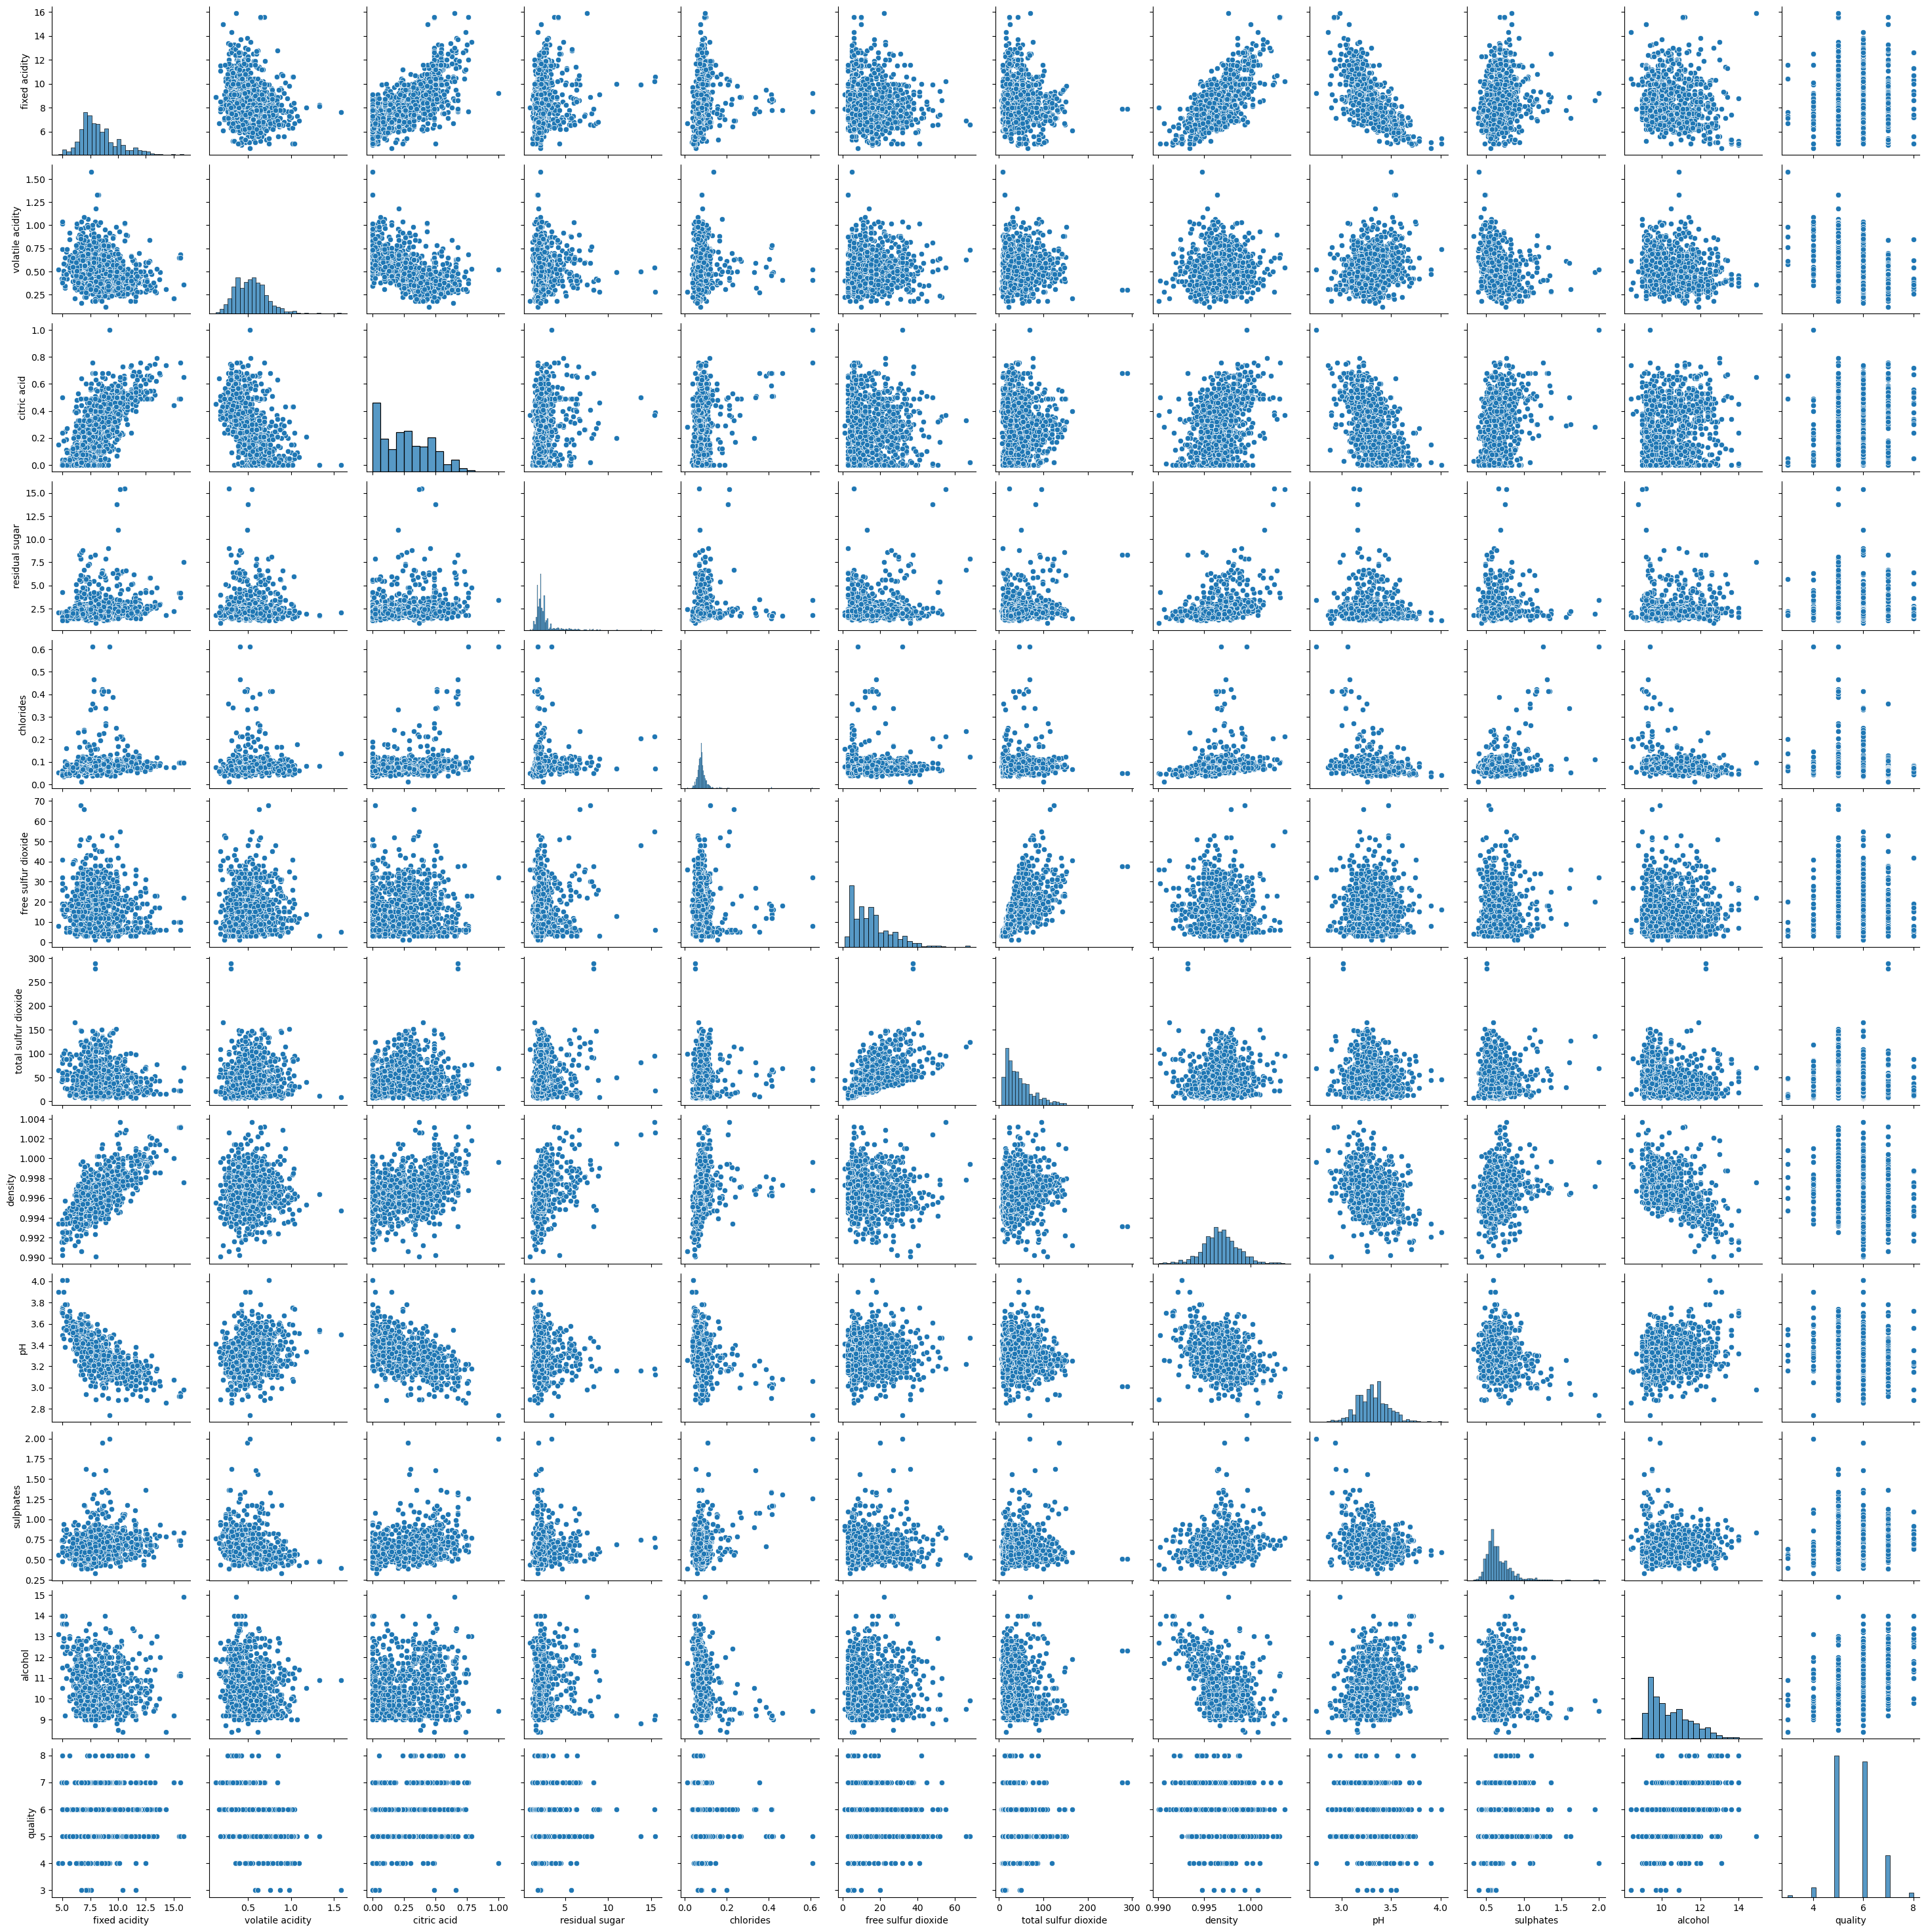

In [7]:
sns.pairplot(df)

<Axes: >

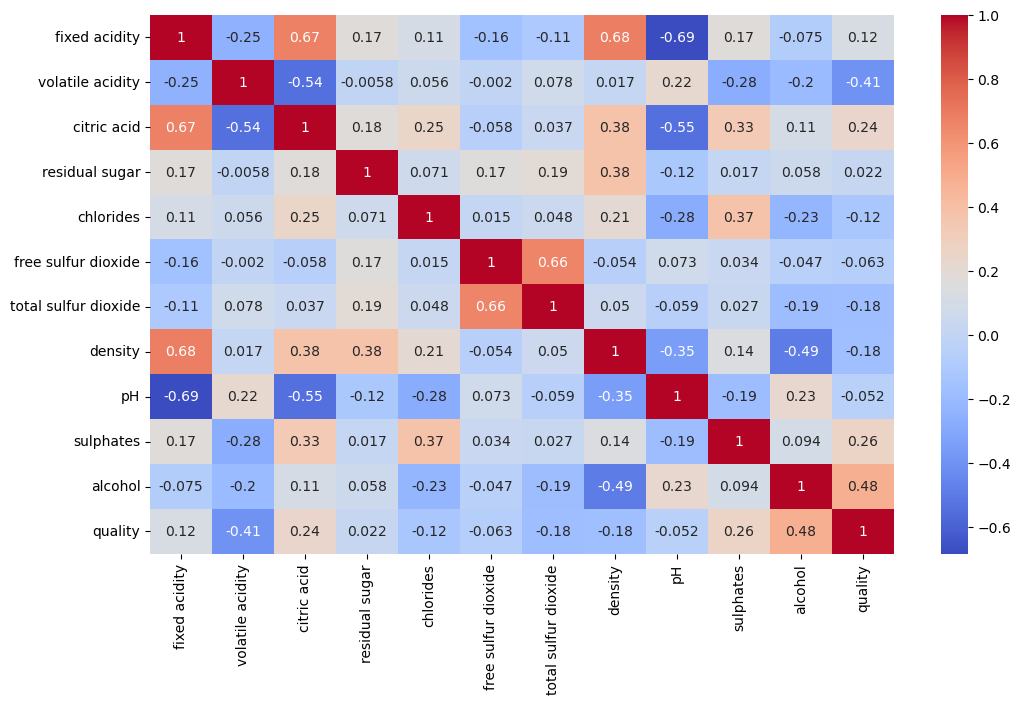

In [8]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

<Axes: xlabel='quality', ylabel='Count'>

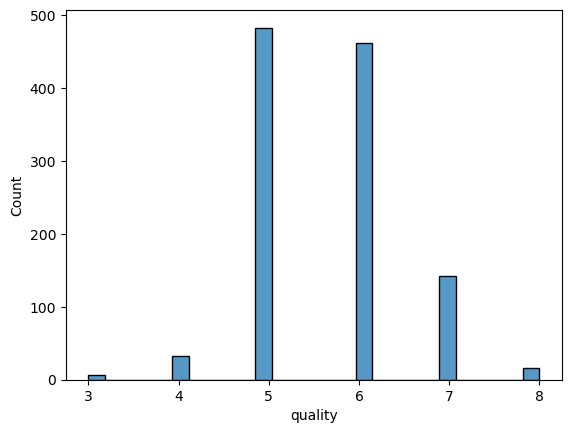

In [9]:
sns.histplot(df['quality'])

<Axes: xlabel='quality', ylabel='alcohol'>

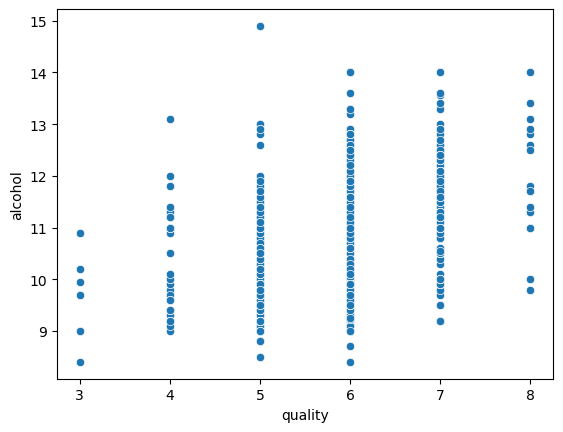

In [10]:
sns.scatterplot(df,x='quality',y='alcohol')

## Insights

- Alcohol , Sulphates And Citric Acid Have Higher Correlation With Quality So Higher The Concentration Of These Higher The Quality Will be.
- And Negative Correlation Is Volatile Acidity Lesser The Concentration Of Voltile Acid Is Higher The Quality Will be.

## Model Training 

In [11]:
y = df['quality']
X = df.drop(['quality'],axis=1)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=47)

In [13]:
from sklearn.linear_model import LogisticRegression
Lr = LogisticRegression(multi_class='multinomial', solver="lbfgs", random_state=42)
Lr.fit(X_train,y_train)

LogisticRegression(multi_class='multinomial', random_state=42)

In [14]:
predictions = (Lr.predict(X_test))

In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         5
           5       0.74      0.72      0.73       155
           6       0.51      0.73      0.60       131
           7       0.60      0.07      0.12        46
           8       0.00      0.00      0.00         5

    accuracy                           0.61       343
   macro avg       0.31      0.25      0.24       343
weighted avg       0.61      0.61      0.58       343



In [19]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [20]:
predictions = rf.predict(X_test)

In [21]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         5
           5       0.76      0.71      0.74       155
           6       0.55      0.71      0.62       131
           7       0.63      0.41      0.50        46
           8       0.00      0.00      0.00         5

    accuracy                           0.65       343
   macro avg       0.32      0.31      0.31       343
weighted avg       0.64      0.65      0.64       343



In [22]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_clf = GridSearchCV(RandomForestClassifier(), param_grid, cv=10)
grid_clf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [23]:
grid_clf.best_score_

np.float64(0.65625)

In [24]:
print(grid_clf.best_estimator_)
best_params = grid_clf.best_params_

RandomForestClassifier(max_depth=20, n_estimators=200)
